# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

- The Smartcab (white car) remains stationary during the course of the simulation. The Smartcab changes its position to a random intersection when a new Trial begins. The other cars appear to moving according to the 'traffic laws' within the simulated world.
- The driving agent:
    - receives a small positive reward (usually between 1 and 3) when it idles at a red light.
    - receives a large negative reward (usually between -4 and -6) when it the agent takes no action (idles) at a green light.
- Changing of the light from green to red makes the reward go from negative to positive. This is because the Smartcab is stationary and this is the correct action to take at a red light.
- Changing of the light from red to green makes the reward go from positive to negative since the correct action for the Smartcab would be to move but it remain stationary blocking traffic and wasting time.
- There is no set dealine that the agent has to meet.
- The destination is denoted by the Udacity icon.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

**A1.**
Three flags in `agent.py`:
- `learning` : When the `learning` flag is set to True, the agent uses Q-learning in order to try and learn an optimum policy. When the flag is set to False, the agent does not learn from it's actions.
- `enforce_deadline`: This flag, when set to True, enforces a time deadline for the agent. When turned off, the agent has no time requirements on completing a trip.
- `epsilon`: A number between 0 and 1. This flag can be used to set the exploration factor which determines the balance between exploring the environment and exploiting the learned values to make decisions.

**A2.**
The `'act()'` function of the `Environment` class is called from the `'update()'` method of the agent when it performs an action.

**A3.**
In `simulator.py`, the `'render_text()'` function writes text updates at every time step to the terminal. The `'render()'` function displays the simulation grid in a GUI using PyGame and *also* displays textual information at every time step.

**A4.**
The `planner.py` function `'next_waypoint()'` will consider East-West direction first.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


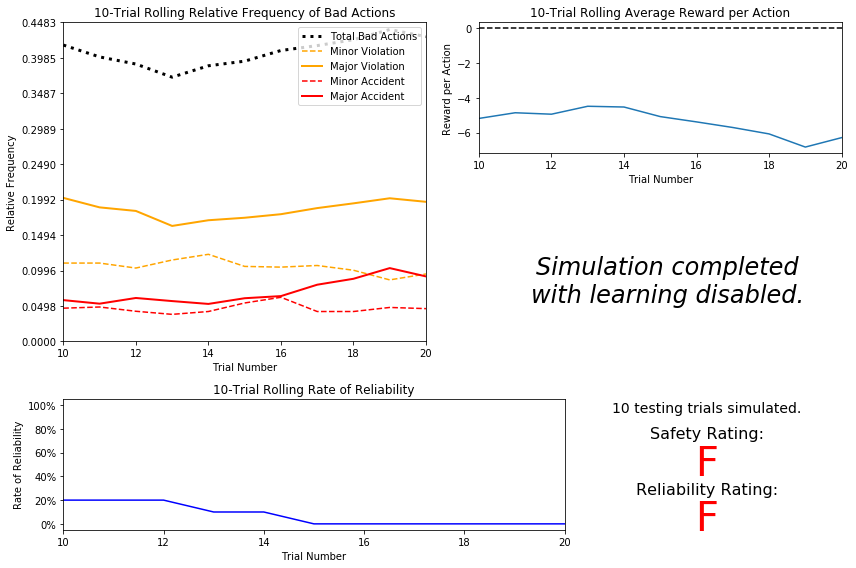

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

- We see the agent making bad decisions approximately 40% of the time. About 11% of these decisions cause accidents (which consist of about 4.5% decisions that cause minor accidents and about 6%-7% decisions that cause major accidents on average).
- The reliability, on an average, is around 10%. This means that the agent completes trips only around 10% of the time which makes sense in this context since the agent is picking out directions randomly. Also, based upon the fact that the agent is taking bad actions 40% of the time, this means that the agent is either actively going farther away from the waypoint or causing traffic accidents/violations in 40% of its actions which also point to the agent having a very bad reliability rating.
- The agent receives, on an average, negative rewards. This is consistent with the fact that the agent takes ~40% bad actions. As discussed earlier, bad actions have a large negative rewards as compared to good actions that have small positive rewards. Based on the graph, total reward received by the agent is about -6. From this and the bad actions graph, we can tell that bad actions - especially decisions that cause accidents - are penalized quite heavily.
- As the number of trials increases, the result does not change significantly since the agent is not learning from its actions.
- This Smartcab is neither safe nor reliable. The cab causes way too many accidents and traffic violations and has a very poor reliability rating of reaching its destination only 10% of the time.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

#### Safety:
- `'light'`: The color of the traffic light is obviously importatnt to avoid accidents.
- `'left'`: In order to make a right turn at a red light, we need to know the traffic situation on the left of the intersection.
- `'oncoming'`: In order to make a left turn on a green light, we need to know about the oncoming traffic. When going straing through or making a right on a green light, although we have the right of way, it is still beneficial to check the oncoming traffic (which might be taking a left turn) to prevent accidents.
 
We don't need the `'right`' sensor data according to US right of way rules.

#### Efficiency:
- `'waypoint'`: In order to know which direction to move in, we need the `waypoint`.
- `'deadline'`: In order to know how much time the agent has left to reach the destination. Based on this, if very little time is left, the agent may decide to take somewhat different actions such as turning right on a red which isn't necessary if there's plenty of time left till the deadline.

Also, if it turns out that our state space becomes too large due to taking all of these features into account, we may remove the `'deadline'` feature since in the real world, the safety of passengers is always far more important than reaching the destination on time. Obviously, this will impact the reliability of the smartcab but if the reliability is good enough, we may decide to keep using only four features. Otherwise, if we have very poor reliability, then we'll have to use all five features and we'll just have to train for a much longer time.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

Let's list out all possible states for each of the features:
- `'light'`: Two possible states: 'red', 'green'.
- `'left'`: Four movement directions: 'forward', 'left', 'right', None.
- `'oncoming'`: Four movement directions: 'forward', 'left', 'right', None
- `'waypoint'`: Three possible states: 'forward', 'left', 'right'
- `'deadline'`: Number of time units = 5 * the distance from start to end. Maximum L1 start-to-end distance in a 8x6 grid $= 8 + 6 = 14$. So, maximum total possible states for deadline $= 14 * 5 = 70$

Our state is a combination of all five features listed above. Total size of state space $ = 2 * 4 * 4 * 3 * 70 = 6720$

Also, since each state has 4 possible actions, total number of Q-values to determine $= 6720 * 4 = 26880$ and each of these Q-values will need to be iterated over many times in order to learn an optimum policy. This appears to be a very large number.

Since this number is a bit too big, we can, as dicussed in answer for Question 4, remove the `'deadline'` from the list of features. This will give us a state size of $$2 * 4 * 4 * 3 = 96$$ which is much smaller.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

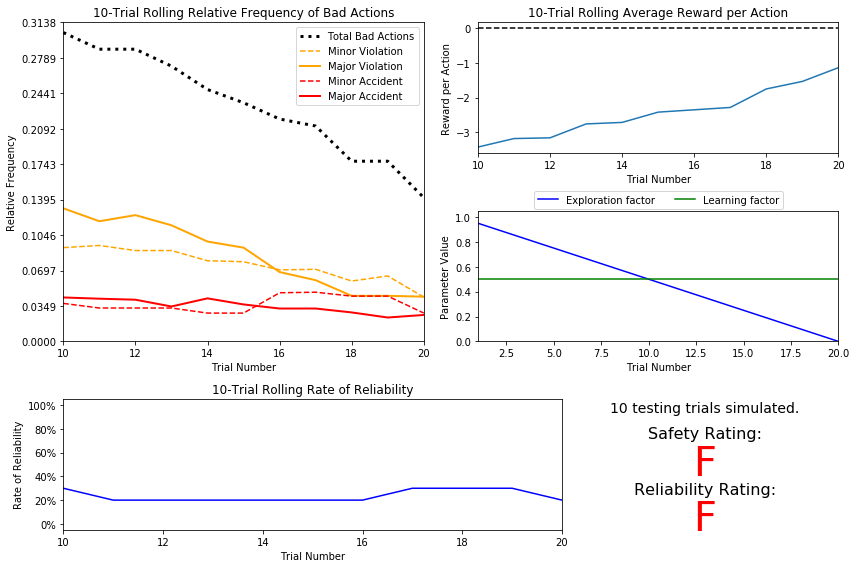

In [3]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**
- The only similarity between the basic driving agent and the Q-Learning agent is the safety and reliability rating. That said, all of our metrics show improvement. By the end of the training:
    - Bad actions have been reduced to 15% (compared to 40% earlier).
    - Actions causing major and minor accidents have been reduced to 3.5% each (before, they were 4.5% and 6.5% respectively).
    - Actions causing major and minor violations have gone down to 5% each from 20% and 10% respectively.
    - The net reward received has a consistent upward trend and the rewards are better from before. This clearly shows that the agent is learning.
- The agent performed 20 training trials. Since epsilon-tolerance starts from 1 and goes down by 0.05 in each trial, it would take 20 steps before the agent stops exploring. Therefore, 20 training trials make sense.
- The decay function for $\epsilon$ is accurately represented in the graph.
- The number of bad actions decreased and the average reward received by the agent increased as the training trials increased. This is clear indication of the agent's learning.
- Safety of the agent is increased, as detailed in the first point of the list. Reliability also increases compared to before, from 10% to 20%.
- The rewards graph and the reliability graph haven't *flattened out* and therefore, we can clearly tell that the Q-learning hasn't yet converged to the optimal Q-values.
- The cab is still far from safe or reliable as is obvious from the safety and reliability ratings which are both F.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

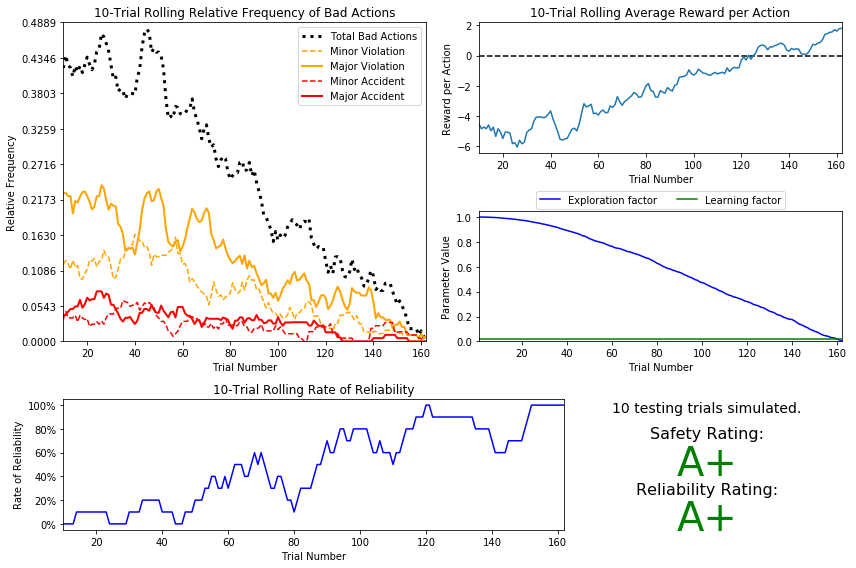

In [27]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**
- After a few trials and errors, I got good results using the cosine function. Specifically:
$$ \epsilon(t) = cos(0.0005 \space t) $$
- It took 176 training trials before the testing began.
- The epsilon-tolerance used was 0.01 and alpha was set to be 0.02. Starting with a larger alpha value (alpha = 0.2), I observed that the algorithm converges to a poor reliability rating. The safety rating was good, however. Therefore, I concluded that we could use smaller alpha values to get the algorithm to converge to better Q-values. After a few tries, descreasing alpha slowly, I got aplha = 0.02 to converge to the above mentioned results. I decreased the epsilon-tolerance from 0.05 to 0.01 to make sure the the algorithm keeps exploring for longer.
- The Q-learner safety rating and the reliability rating, both, improve from F to A+. This is quite a large improvement.
- Since the agent is both very safe and very reliable, it means that it can pick the correct action for each state to maximize the reward. So, the agent has learned an appropriate policy.
- The Smartcab is both highly safety and highly reliable. We could probably make some more improvements to the reliability of the Smartcab by training it with the `'deadline'` feature but it would take a lot more time.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

**A1.** The optimal policy for a state is the action that provides the highest long-term expected reward. In this context, this means an action that would take the agent closer to the destination while also obeying the laws of traffic and not causing any accidents or traffic violations. Since in our Q-learning we're not considering future rewards, the algorithm is greedy - it only looks at the best action from the point of view of the current state's transition to the next state. This rule can be explained with the help of a few examples:

1. State: (Light : Green,  Left : Forward, Oncoming : Forward, Waypoint : Forward)
    - Optimal policy: Forward.
    - Explanation: The waypoint is in front and we have the right of way in going forward. Therefore, this is the optimal policy since any other action will result in receiving lesser long-term reward.

2. State: (Light : Green,  Left : Forward, Oncoming : Forward, Waypoint : Right)
    - Optimal policy: Forward.
    - Explanation: The waypoint is to the right and we have the right of way in going right. Therefore, this is the optimal policy.

3. State: (Light : Green,  Left : Forward, Oncoming : Forward, Waypoint : Left)
    - Optimal policy: Forward or Right. See explanation below.
    - Explanation: The waypoint is to the left and we have traffic oncoming. Therefore, doing nothing might appear to be the optimal policy. But, we've found that staying idle on a green can give negative rewards. So here, if the waypoint can be reached using an alternate way - that is, instead of going left followed by right, we can go forward followed by a left - then the optimal policy would certainly not be to Idle since the alternate route will have a bigger, positive reward. Therefore, the optimal policy might be to go forward. Similarly, going to the right might provide better reward since the deadline is not part of the state. The optimal policy for state s = `argmax(Q(s, a), set of all possible actions in state s)`.
    
4. State: (Light : Green,  Left : Forward, Oncoming : None, Waypoint : Left)
    - Optimal policy: Left.
    - Explanation: The waypoint is to the left and there is no oncoming traffic. Therefore, we can take a left and this is the optimal policy.
    
5. State: (Light : Red,  Left : Forward, Oncoming : Forward, Waypoint : Left)
    - Optimal policy: None (Idle).
    - Explanation: The waypoint is to the left but the light is red and there is oncoming traffic from the left. So, the only action the agent can perform that doesn't result in negative rewards is to idle which is the optimal policy.
    
6. State: (Light : Red,  Left : None, Oncoming : Forward, Waypoint : Right)
    - Optimal policy: Right.
    - Explanation: The waypoint is to the right and while the light is red, there is no oncoming traffic from the left. So, we can take a right turn to get closer to the destination withough causing any violations or accidents. This, therefore, is the optimal policy.
    
7. State: (Light : Red,  Left : None, Oncoming : Forward, Waypoint : Left)
    - Optimal policy: Idle (Also possible: Right).
    - Explanation: The waypoint is to the left and while the light is red, there is no oncoming traffic from the left. Then, the optimal policy at a first glance appears to be to Idle. However, we can also take a right at this point since there is no traffic coming from our left. This would take us away from the destination but since our state does not contain the deadline, the optimal policy might be to take a right since it might give us a better reward. If our state would have included the deadline, then there could have been two cases:
        - Little time left: The optimal policy would have been to Idle since going to the right would take us away from the destination.
        - Lots of time left: The optimal policy would have been to go to the right since this way, we could accumulate more reward.
    
In this way, we can enumerate all possible 96 states using the rule of thumb mentioned above. However, the action chosen from this rule of thumb may not be alway be the optimal policy for a state as described in point #3 above. But, in most cases, we should be able to predict the optimal policy from this simple rule.

**A2.** Looking at `'sim_improved-learning.txt'`, we find:

For most states, the optimal policy follows as per the discussion in the Answer 1 above. There were a few states which do not (appear to) follow the optimal policy. Some of them are:

**The State tuple description: (Light, Left, Oncoming, Waypoint)**

#### State 1:

```
('green', None, 'right', 'right')
 -- forward : 0.08
 -- left : -2.31
 -- right : 0.07
 -- None : -0.63
```

Expected policy: Right

Actual policy: Forward

#### State 2:

```
('red', None, 'right', 'right')
 -- forward : -0.81
 -- left : -0.81
 -- right : 0.02
 -- None : 0.18
```

Expected policy: Right

Actual policy: Idle (None)

#### State 3:

```
 ('green', 'forward', 'forward', 'forward')
 -- forward : 0.02
 -- left : -0.79
 -- right : 0.06
 -- None : -0.22
```

Expected policy: Forward

Actual policy: Right

#### State 4:

```
('green', 'left', 'left', 'forward')
 -- forward : 0.08
 -- left : 0.05
 -- right : 0.22
 -- None : -0.09
```

Expected policy: Forward

Actual policy: Right

In all these cases, the second best Q-value points to the expected optimal policy. Therefore, it is possible that with a few more iterations, these Q-values would converge to the expected optimal policy.

**A3.** A few examples from the Q-table that demonstrate that the agent is following optimal policy are:

#### State 1:

```
('green', 'left', None, 'left')
 -- forward : 0.15
 -- left : 0.42
 -- right : 0.05
 -- None : -0.78
```

$\pi(s) = left$ : This is the optimal policy because on a green light, we're turning left towards our destination (as indicated by the waypoint) and we have there is no vehicle approaching from the front and so we have the right of way. This would give us a net positive reward, more than all other possible actions.


#### State 2:

```
('red', 'right', 'right', 'right')
 -- forward : -0.18
 -- left : 0.00
 -- right : 0.04
 -- None : 0.00
```

$\pi(s) = right$ : This is the optimal policy because on a red light, we're turning right towards our destination (as indicated by the waypoint) and we have the right of way because there is no vehicle approaching in our lane from our left (since the vehicle on the left is turning to *its* right) so we're not causing any accidents or violations.


#### State 3:

```
('red', 'left', 'left', 'left')
 -- forward : -1.53
 -- left : -0.79
 -- right : 0.03
 -- None : 0.40
```

$\pi(s) = None$ : This is the optimal policy because we're on a red light, looking to turn left and there is no vehicle approaching in our lane from our left. As discussed previously, in this case the optimal policy can either be to Idle (more likely) or to turn right (less likely since this takes us away from our destination). In this case, the Q-value indicates that the optimal policy is to idle at the red light which would net us positive reward (and better reward when compared to turning right)

**A4.** One state where the agent did *not* learn the optimal policy is:

```
('green', None, 'right', 'right')
 -- forward : 0.08
 -- left : -2.31
 -- right : 0.07
 -- None : -0.63
```

Here, we're at a green light, looking to turn right, with no oncoming traffic in our lane (the car opposite us is looking to turn to *its* right). This clearly shows that the optimal policy should be to turn right. Instead however, the agent is going forward. Therefore, the agent hasn't learned the optimal policy.

The second largest Q-value is for turning to the right and is very close to the max Q-value - this is indicative of the fact that the Q-learning has not yet converged for this state. Running the algorithm for more time steps might resolve this issue.



-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

1. Since in the environment, the start and the end points keep changing (at each trial), this means that any policy based upon the future rewards is going to be wrong since the 'future' itself keeps changing - any rewards backpropagated from one possible destination might result in a completely opposite policy for a different destination.
2. The cab knows only about its local surroundings - where are the other cars at the current intersection, which direction to go next and the deadline. If the cab had some way of sensing it's destination relative to its current position, then it would have been possible to include this information in the state and then, we could have backpropagated rewards through the cab's movement. This would have increased the state space many times but it would have allowed us to use the discount factor `'gamma'` to take into account the future states as well. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.